* **1. Imported Needed Libraries**

In [1]:
from tensorflow.keras import models , layers , regularizers ,metrics, losses ,optimizers
from tensorflow.keras.utils import plot_model

In [4]:
# Number Of Latent Factors == Features == Columns
emb_size = 50 
vocab_size = 1000

# User Embeddings  
user = layers.Input(shape=(1,),name ="word_1")
user_emb = layers.Embedding(vocab_size,emb_size,embeddings_regularizer=regularizers.l2(1e-6),name ='U_Embedding_LUT')(user)
user_emb = layers.Reshape((emb_size,))(user_emb)

#Movie Embeddings 
movie = layers.Input(shape=(1,) , name ='word_2')
movie_emb = layers.Embedding(vocab_size,emb_size,embeddings_regularizer=regularizers.l2(1e-6), name = "V_Embedding_LUT")(movie)
movie_emb = layers.Reshape((emb_size,))(movie_emb)

#Dot Product 
rating = layers.Dot(axes=1 , name = 'Co-occurrence_Statistics')([user_emb,movie_emb])

In [5]:
# Model 
model =models.Model([user,movie],rating)
#Compile Model 
model.compile(loss='mse',metrics = metrics.RootMeanSquaredError(), optimizer = optimizers.Adam(lr = 0.001))


c:\Users\Alhou\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [6]:

# Show Model Summary 
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 word_1 (InputLayer)            [(None, 1)]          0           []                               
                                                                                                  
 word_2 (InputLayer)            [(None, 1)]          0           []                               
                                                                                                  
 U_Embedding_LUT (Embedding)    (None, 1, 50)        50000       ['word_1[0][0]']                 
                                                                                                  
 V_Embedding_LUT (Embedding)    (None, 1, 50)        50000       ['word_2[0][0]']                 
                                                                                              

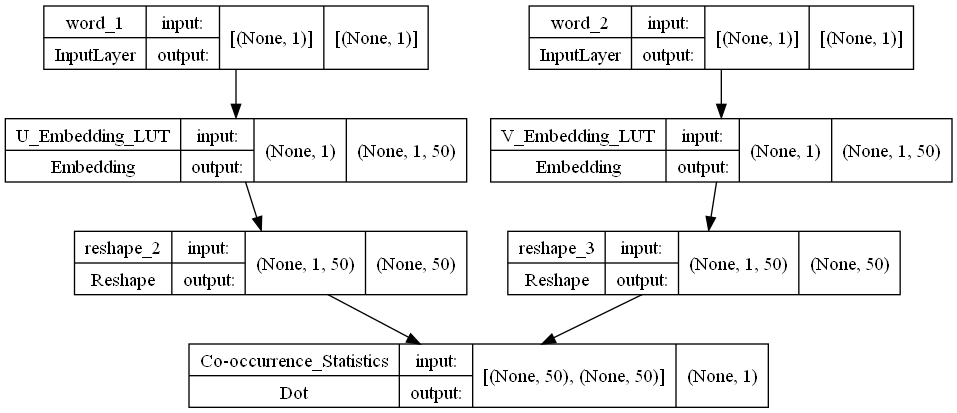

In [7]:
plot_model(model , show_shapes=True , show_layer_names=True)

# Continue


In [11]:
# https://github.com/erwtokritos/keras-glove/blob/master/
CENTERAL_EMBEDDINGS = 'centeral_embedings'
CONTEXT_EMBEDDINGS =  'context_embeddings'
CENTERAL_BIASES = 'centeral_biases'
CONTEXT_BIASES = 'context_biases'
#------------------------------------------------------------------------
#Create Function 
def glove_model (vocab_size = 10 , vector_dim = 3):
    """A Keras implementation of the GloVe architecture
    :param vocab_size: The number of distinct words
    :param vector_dim: The vector dimension of each word
    :return: """
    #First Create Input Target(Target Task) & Input_Context
    input_target = layers.Input((1,) , name = 'central_word_id')
    input_context= layers.Input((1,) , name = 'context_word_id')
    #------------------------------------------------------------------------
    # Select Central Embeddings & Context
    central_embedding = layers.Embedding(vocab_size, vector_dim, input_length=1, name=CENTERAL_EMBEDDINGS)
    central_bias = layers.Embedding(vocab_size, 1, input_length=1, name=CENTERAL_BIASES)
    #----------------------------------------------------------------------------
    context_embedding = layers.Embedding(vocab_size,vector_dim, input_length = 1 , name = CONTEXT_EMBEDDINGS)
    context_bias = layers.Embedding(vocab_size,1,input_length = 1 , name = CONTEXT_BIASES)
    #=-----------------------------------------------------------------------------------
    vector_target = central_embedding(input_target)
    vector_context= context_embedding(input_context)
    #-------------------------------------------------------------------------------------
    bias_target = central_bias(input_target)
    bias_context=context_bias(input_context)
    #-----------------------------------------------------------------------------------
    #DOT Product 
    #------------------------------
    dot_product = layers.Dot(axes=-1)([vector_target,vector_context])
    dot_product = layers.Reshape((1,))(dot_product)
    bias_target =layers.Reshape((1,))(bias_target)
    bias_context=layers.Reshape((1,))(bias_context)
    #-------------------------------------------------------------------------------------
    prediction = layers.Add()([dot_product,bias_target,bias_context])
    #------------------------------------------------------------------------------------
    model = models.Model(inputs=[input_target,input_context], outputs = prediction)
    model.compile(loss='mse',optimizer=optimizers.Adam())
    #---------------------------------------------------------------------------------
    return model 

# Call Model 


In [12]:
model = glove_model(vocab_size,emb_size)
#show Model 
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 central_word_id (InputLayer)   [(None, 1)]          0           []                               
                                                                                                  
 context_word_id (InputLayer)   [(None, 1)]          0           []                               
                                                                                                  
 centeral_embedings (Embedding)  (None, 1, 50)       50000       ['central_word_id[0][0]']        
                                                                                                  
 context_embeddings (Embedding)  (None, 1, 50)       50000       ['context_word_id[0][0]']        
                                                                                            

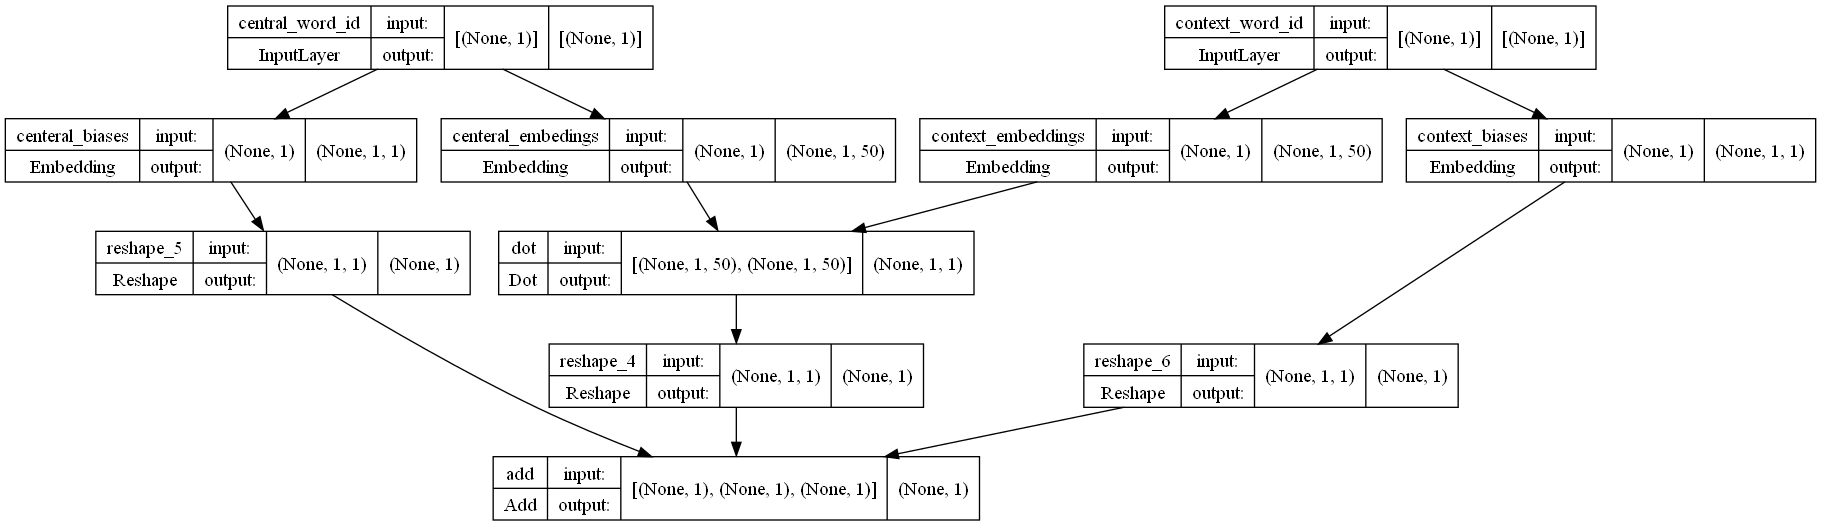

In [13]:
plot_model(model , show_shapes=True , show_layer_names=True)